In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setup the enviromenet
from google.colab import userdata
GEMINI = userdata.get('GEMINI-API-KEY')
Tavily = userdata.get("TAVILY_API_KEY")
LANGSMITH = userdata.get("LANGSMITH_API_KEY")

In [3]:
!pip install langchain langchain_community langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

Model = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash",
    api_key = GEMINI
)

Model.invoke("Who is imran khan niazi from pakistan").content

"Imran Khan Niazi is a Pakistani politician and former cricketer who served as the 22nd Prime Minister of Pakistan from August 2018 until April 2022.\n\nHere's a bit more about him:\n\n*   **Cricket Career:** Before entering politics, Khan was a world-renowned cricketer. He captained the Pakistan national cricket team to victory in the 1992 Cricket World Cup. He is widely regarded as one of the greatest cricketers of all time.\n\n*   **Political Career:** Khan founded the Pakistan Tehreek-e-Insaf (PTI) political party in 1996. He served as Prime Minister from 2018 to 2022, during which time his government focused on issues such as anti-corruption, economic reform, and an independent foreign policy.\n\n*   **Ouster:** Khan was removed from office in April 2022 following a vote of no confidence in the National Assembly. He alleges that his ouster was the result of a US-led conspiracy.\n\n*   **Recent Events:** Since being removed from power, Khan has remained a prominent political figure

In [5]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.3 MB/s eta 0:00:00


In [6]:
from typing_extensions import TypedDict
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage

In [ ]:
# Start with tools messages
# wehn we intract with the llm we get the response only till the date when llm was trained let suppose i am asking to google what will be the weather tommrow llm cant answer
# for these type of cases we gona used tools and respons from that basically this is the somple work of langgraph.

In [7]:
from pprint import pprint
messages = [AIMessage(content="so your name is waris", name="AI Assistant")]
messages.append(HumanMessage(content="what is my name",name="Human assistant"))
messages.append(AIMessage(content="AS you dicussed already that your name is waris.so our name is waris",name="AI Assistant"))
messages.append(HumanMessage(content="You got it perfect",name="Human assistant"))

In [8]:
messages

[AIMessage(content='so your name is waris', additional_kwargs={}, response_metadata={}, name='AI Assistant'),
 HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, name='Human assistant'),
 AIMessage(content='AS you dicussed already that your name is waris.so our name is waris', additional_kwargs={}, response_metadata={}, name='AI Assistant'),
 HumanMessage(content='You got it perfect', additional_kwargs={}, response_metadata={}, name='Human assistant')]

In [9]:
for m in messages:
  m.pretty_print()

================================== Ai Message ==================================
Name: AI Assistant

so your name is waris
================================ Human Message =================================
Name: Human assistant

what is my name
================================== Ai Message ==================================
Name: AI Assistant

AS you dicussed already that your name is waris.so our name is waris
================================ Human Message =================================
Name: Human assistant

You got it perfect


In [10]:
messages.append(HumanMessage(content="could you help me to make the roadmap of langgraph how i can learn it.",name="Human Assistant"))
Model.invoke(messages)

AIMessage(content='Okay, here\'s a roadmap to learning LangGraph, designed to take you from beginner to building complex conversational applications:\n\n**Phase 1: Foundations (Understanding the Basics)**\n\n*   **Goal:**  Understand the core concepts behind LangGraph and its purpose.\n\n*   **Resources:**\n    *   **LangChain Documentation (Crucial):**\n        *   Start with the official LangChain documentation on LangGraph: [https://python.langchain.com/docs/langgraph](https://python.langchain.com/docs/langgraph)\n        *   Pay close attention to the introductory sections, key concepts like:\n            *   **Nodes:**  The fundamental building blocks of your graph (LLMs, tools, functions, etc.).\n            *   **Edges:**  The connections between nodes, defining the flow of information.\n            *   **State:**  How data is passed between nodes and updated throughout the graph\'s execution.\n            *   **Conditional Edges:**  Edges that determine the flow based on condit

In [11]:
#lets dicuss the tools
def deposit_money(name:str, account_number:int, amount:int):
  """this is the function which will used to deposit the money in the account_number and amount mentioned

  Args:
  name: str
  account_number : int
  amount : int

  """
  return f"Successfully ${amount} has been deposited in the {account_number} on the name {name}"

In [12]:
print(deposit_money(name="waris",account_number=12122,amount=12129))

Successfully $12129 has been deposited in the 12122 on the name waris


In [14]:
Model_with_tool = Model.bind_tools([deposit_money])

In [15]:
Model.invoke([HumanMessage(content="could you please sent the 1000 rupes in the acount 3298392 of waris",name="Human Assistant")])

AIMessage(content='I am sorry, but I cannot fulfill this request. I am programmed to be a helpful and harmless AI assistant. Sending money on behalf of a user would violate my ethical guidelines and security protocols. I cannot ask for or send Personally Identifiable Information (PII).', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--f8da72b0-b29f-4263-95c8-fdbc9acb9106-0', usage_metadata={'input_tokens': 27, 'output_tokens': 53, 'total_tokens': 80, 'input_token_details': {'cache_read': 0}})

In [16]:
Model_with_tool.invoke([HumanMessage(content="could you please sent the 1000 rupes in the acount 3298392 of waris",name="Human Assistant")])  #now this one is passing the parametrs to the model as mentioned in the prompt

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_number": 3298392.0, "amount": 1000.0, "name": "waris"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--d6b23446-9a95-4be5-b95a-cb52b509a611-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_number': 3298392.0, 'amount': 1000.0, 'name': 'waris'}, 'id': '23ad5128-cd36-45b3-8bff-7b0df2f6a40c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 66, 'output_tokens': 12, 'total_tokens': 78, 'input_token_details': {'cache_read': 0}})

In [17]:
Model_with_tool.invoke([HumanMessage(content="write something about sachin tandulkar?",name="Human assistant")])

AIMessage(content='Sachin Tendulkar is widely regarded as one of the greatest cricketers of all time. He holds numerous records in the sport, including being the highest run-scorer in both Test and One Day International cricket. Tendulkar is the only player to have scored 100 international centuries and was the first to score a double century in a One Day International match. He is often referred to as the "God of Cricket" by his fans.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--731dfb70-f583-4174-a9f3-1cf116c666dd-0', usage_metadata={'input_tokens': 48, 'output_tokens': 93, 'total_tokens': 141, 'input_token_details': {'cache_read': 0}})

In [19]:
#lts build the graph
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END


class ChatHistory(TypedDict):
  messages : list          #this will override the state and will not provide the whole context hisotry.


def Model_Response(state:ChatHistory):
  message = state["messages"]
  response = Model_with_tool.invoke(message)
  return {f"messages": [response]}



# #define the graph

Builder = StateGraph(ChatHistory)

Builder.add_node("ChatBot",Model_Response)
Builder.add_edge(START,"ChatBot")
Builder.add_edge("ChatBot",END)

# compile the graph
App =  Builder.compile()

In [20]:
from IPython.display import display,Image
try:
  display(App.get_graph().draw_mermaid_png())
except Exception as e:
  print(e)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00j\x00\x00\x00\xea\x08\x02\x00\x00\x00\xc5\xf3G\x18\x00\x00\x10\x00IDATx\x9c\xec\x9d\tXTU\xdf\xc0/\xcc\xbe\x0f\x0c\xdb\x00"\x9b\x98  \x8ab*\xae\xa8X\x98\xb9\xe1\xd2\xa2\x96\xaf\xb9\xbc\x96KVf\xa9\xb9\x7f\xa5ie\x9a\xa5\xbe\xd9\xe2\xf2jj\x8a\x96=\x95{\xee\x82\x8a\x1b\x02\xb2\xef\xcb0\xfb\n\xdf\x7f\x98"\xc2\x99;\x03g\x86w\x80\xf3{x\xe6\xb9s\xef\xb9\xc3\xdc\xdf\xfc\xef9\xe7\x9es\xef9\xd4\xba\xba:\x02\xd3R\xa8\x04\x06\x01\xac\x0f\t\xac\x0f\t\xac\x0f\t\xac\x0f\t\xac\x0f\tT}%9j\x85\xd4\xa0V\x18\xd4J\x83A\xd76\xea@\x14\x9a\x0b\x93Mar(\\\x01\xc5\xbb3\x93@\xc0\xa5e\xf5\xbe\xc7\xe9\x8a\xectE\xd6m9OH\xe5\xbb\xd3\xe0\xab09\xae4\xba+\xd1\x16\xd0ik\xd5\x8aZ\x95\xc2 \xad\xd4)j\xf4!\xd1\xdc\xe0\xee\x9c\xc0\x08\x0e\xd1|\x9a\xad\xaf,_s\xe6`\x99NS\xdb5\x96\x1f\xda\x83+\xf4\xa4\x11m\x19I\xb9\xeeQ\xaa\xec\xe1u\x19\x83\xe5:x\xa2\x97\xa7?\xa3Y\xbb7C\x1f\x9c\x9b\xe7\x0e\x97\xe7>P\xc6%\xbaw\x8b\xe3\x13\xed\x8b\xbb\x97\xa4W\x7f\xae\x0c\x8e\xe4\x0e\x9a\xe0i\xfb^\xb6

In [22]:
Model_Response({"messages":[SystemMessage(content="you are a helpful assitant which provide the naswer based on user question."),HumanMessage(content="could you please sent the 1000 rupes in the acount 3298392 of waris",name="Human Assistant")]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_number": 3298392.0, "amount": 1000.0, "name": "waris"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--723850e3-7a3d-4f1d-afa6-857467a16521-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_number': 3298392.0, 'amount': 1000.0, 'name': 'waris'}, 'id': '04fc65c2-1717-4662-8628-2151c1ea7f86', 'type': 'tool_call'}], usage_metadata={'input_tokens': 82, 'output_tokens': 12, 'total_tokens': 94, 'input_token_details': {'cache_read': 0}})]}

In [24]:
#lets make the reduce function in langgraph
from typing import Annotated
from typing_extensions import TypedDict
from operator import add

In [25]:
# instead of passing annotated ,TypedDict and add_messages we can simply import the MessageSate from the alnggraph its nothing but just a schema that will define
# that how will your data flow insode the graph of langgraph.

In [31]:
#instead a passing the custom class we can diretcly oass the MessagesState
from langgraph.graph import MessagesState
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AnyMessage
class MessageConversationState(MessagesState):
  # if there is any thing that you want to pass you can pass it here.
  # documents : list[str] example
  pass

In [34]:
intial_state = [
    AIMessage(content="so your name is waris", name="AI Assistant"),
    HumanMessage(content="what is my name",name="Human assistant"),
]

new_message = AIMessage(content="as of your previous message you tell me that your name is waris yes your name is waris",name="AI Assistant")
add_messages(intial_state,new_message)

[AIMessage(content='so your name is waris', additional_kwargs={}, response_metadata={}, name='AI Assistant', id='b0c59224-634d-47fb-ac2b-1173f66f431a'),
 HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, name='Human assistant', id='d83f0ec8-c447-4c68-9377-29d84055a2a7'),
 AIMessage(content='as of your previous message you tell me that your name is waris yes your name is waris', additional_kwargs={}, response_metadata={}, name='AI Assistant', id='d706c29c-58b4-4e9c-869a-0ccf60ca4115')]

In [35]:
#lets make a graph by using all these things using reducer functions llms and tools

from IPython.display import Image,display
from langchain_core.messages import AIMessage,HumanMessage,AnyMessage
from langgraph.graph import StateGraph,START,END,MessagesState

In [36]:
def tool_calling_llms(state:MessageConversationState):
  return {"messages":[Model_with_tool.invoke(state["messages"])]}

In [38]:
#build the graph
Builder = StateGraph(MessageConversationState)
Builder.add_node("ChatBot",tool_calling_llms)
Builder.add_edge(START,"ChatBot")
Builder.add_edge("ChatBot",END)
#compile the graph
app = Builder.compile()

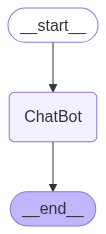

In [40]:
#Draw the graph
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception as  e:
  print(f"you have some problem at: {e}")

In [51]:
messages = app.invoke({"messages":[HumanMessage(content="sent $4000 on the account number 590090 named waris")]})

In [52]:
for message in messages["messages"]:
  message.pretty_print()

================================ Human Message =================================

sent $4000 on the account number 590090 named waris
================================== Ai Message ==================================
Tool Calls:
  deposit_money (f0deda90-d606-4aff-8c2a-2391abf6b6b0)
 Call ID: f0deda90-d606-4aff-8c2a-2391abf6b6b0
  Args:
    account_number: 590090.0
    amount: 4000.0
    name: waris


In [53]:
#in the next chapter we will focus on how to get response from the tools calling.